Lane Detection \
Selezione manuale

In [11]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

Import Video

In [12]:
# Define the relative path to the video file
notebook_dir = Path().resolve()
project_root = notebook_dir.parent.parent
video_path = project_root / "data" / "recording_2" / "Recording_2_normal_speed.mp4"
video_path = str(video_path)

# Load the video
cap = cv2.VideoCapture(video_path)

# Check
print(f"Opened: {cap.isOpened()}, FPS: {cap.get(cv2.CAP_PROP_FPS)}, Total Frames: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}")

Opened: True, FPS: 59.94005994005994, Total Frames: 276.0


Get 1 frame

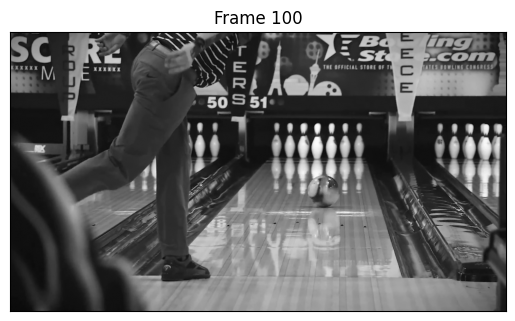

In [78]:
# Set frame position
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)
ret, colored_image = cap.read()
if not ret:
    print("Failed to read the frame")
    cap.release()
    exit()

# grayscale
image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)

# Show the image
plt.imshow(image, cmap='gray')
plt.title('Frame 100')
plt.xticks([]), plt.yticks([])
plt.show()

OTSU THRESHOLD FOR EDGE DETECTION \
good automatic way to find the threshold

Text(0.5, 1.0, 'Canny Edges')

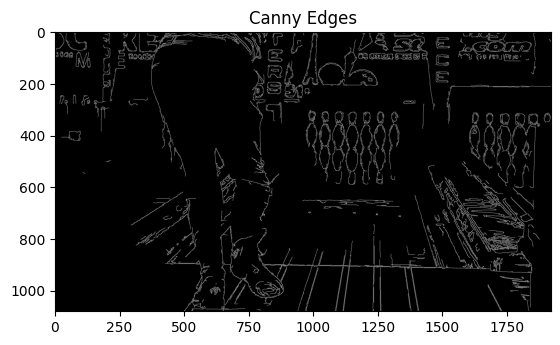

In [69]:
# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(image, lower, upper)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

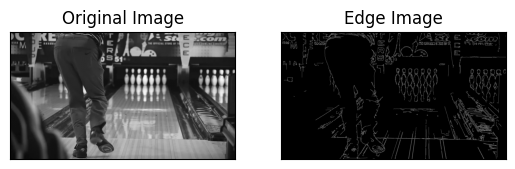

In [70]:
# Display the original image and the edge-detected image
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Line Detection

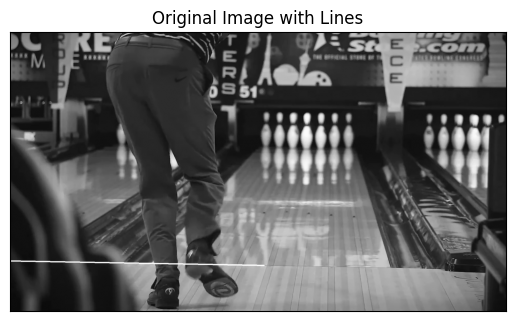

In [72]:
# Use Hough Line Transform to detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 300)

image_copy = np.copy(image)
# Draw the lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with detected lines
plt.imshow(image_copy, cmap='gray')
plt.title('Original Image with Lines')
plt.xticks([]), plt.yticks([])
plt.show()

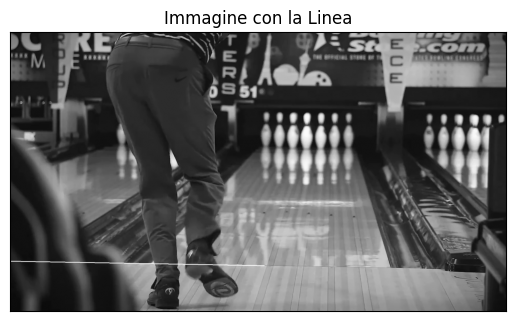

In [73]:
# Seleziona la linea
selected_line = lines[0]

# Estrai rho e theta
rho, theta = selected_line[0]

# Calcola i punti di inizio e fine della linea
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
x1 = int(x0 + 1000 * (-b))
y1 = int(y0 + 1000 * (a))
x2 = int(x0 - 1000 * (-b))
y2 = int(y0 - 1000 * (a))

# Crea una copia dell'immagine originale
image_with_line = np.copy(image)

# Disegna la linea sull'immagine
cv2.line(image_with_line, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Mostra l'immagine con la linea selezionata
plt.imshow(image_with_line, cmap='gray')
plt.title('Immagine con la Linea')
plt.xticks([]), plt.yticks([])
plt.show()

linee da selezionare:\
bottom: [887.          1.5882496]\
left: [1.069e+03, 7.330383e-01]\
right: [-1173.0, 2.8448865]

In [95]:
bottom_line = [[937.0, 1.5882496]]
print(bottom_line)
left_line = [[1.069e+03, 7.330383e-01]]
print(left_line)
right_line = [[-1173.0, 2.8448865]]
print(right_line)

[[937.0, 1.5882496]]
[[1069.0, 0.7330383]]
[[-1173.0, 2.8448865]]


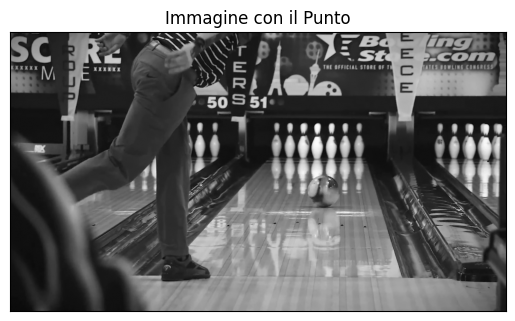

In [90]:
# Create a copy of the original image
image_with_point = np.copy(image)

# Draw a circle at the point
cv2.circle(image_with_point, (1850, 500), radius=3, color=(0,0,0), thickness=-1)

# Display the image with the point
plt.imshow(image_with_point, cmap='gray')
plt.title('Immagine con il Punto')
plt.xticks([]), plt.yticks([])
plt.show()


Punti per quarta linea:\
(1200,495)\
(1850,500)

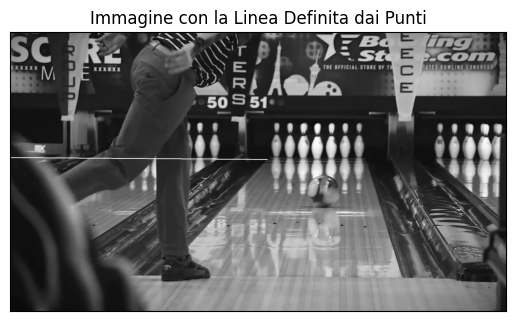

In [91]:
# Definisci i punti
x1, y1 = 1200, 495
x2, y2 = 1850, 500

# Calcola i parametri rho e theta
delta_x = x1 - x2
delta_y = y1 - y2
theta = np.arctan2(delta_y, delta_x) + np.pi / 2
rho = x2 * np.cos(theta) + y2 * np.sin(theta)

# Calcola i punti di inizio e fine della linea
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
x1_line = int(x0 + 1000 * (-b))
y1_line = int(y0 + 1000 * (a))
x2_line = int(x0 - 1000 * (-b))
y2_line = int(y0 - 1000 * (a))

# Crea una copia dell'immagine originale
image_with_line = np.copy(image)

# Disegna la linea sull'immagine
cv2.line(image_with_line, (x1_line, y1_line), (x2_line, y2_line), (255, 0, 0), 2)

# Mostra l'immagine con la linea
plt.imshow(image_with_line, cmap='gray')
plt.title('Immagine con la Linea Definita dai Punti')
plt.xticks([]), plt.yticks([])
plt.show()

top_line = np.array([[rho, theta]])

In [87]:
print(top_line)
print(bottom_line)
print(left_line)
print(right_line)

[[-485.75485954   -1.56310417]]
[[900.0, 1.5882496]]
[[1069.0, 0.7330383]]
[[-1173.0, 2.8448865]]


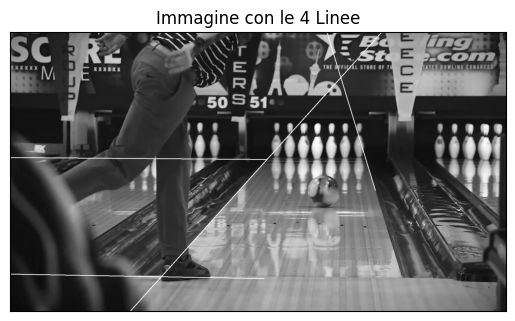

In [96]:
# Crea una copia dell'immagine originale
image_with_all_lines = np.copy(image)

# Funzione per disegnare una linea sull'immagine
def draw_line(image, line, color=(255, 0, 0), thickness=2):
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), color, thickness)

# Disegna le linee sull'immagine
draw_line(image_with_all_lines, top_line)
draw_line(image_with_all_lines, bottom_line)
draw_line(image_with_all_lines, left_line)
draw_line(image_with_all_lines, right_line)

# Mostra l'immagine con tutte le linee
plt.imshow(image_with_all_lines, cmap='gray')
plt.title('Immagine con le 4 Linee')
plt.xticks([]), plt.yticks([])
plt.show()

Esporta le linee in lane_lines.csv

In [98]:
# Definisci il path del file CSV
path_data = '/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/auxiliary_data/lane_lines_2.csv'

# Crea un array combinato con tutte le linee
lane_lines = np.vstack((top_line, bottom_line, left_line, right_line))

# Salva l'array combinato in un file CSV
np.savetxt(path_data, lane_lines, delimiter=',', header='rho,theta', comments='')